# Проект: Статистический анализ данных сервиса аренды самокатов GoFast

Нам передали данные из популярного сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить ряд гипотез, которые могут помочь бизнесу вырасти.  
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки:
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra:
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — б  есплатно.

**Цель исследования**  
Основными целями данного проекта являются:  
- исследование следующих параметров:
    - частота встречаемости городов;
    - соотношение пользователей с подпиской и без подписки;
    - возраст пользователей;
    - расстояние, которое пользователь преодолел за одну поездку;
    - продолжительность поездок.
- подсчет выручки;
- проверка следующих гипотез:
    - пользователи с подпиской тратят больше времени на поездки;
    - среднее расстояние, которое проезжают пользователи с подпиской, составляет менее 3130 м;
    - помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки;
    - количество обращений в техподдержку после обновления серверов снизилась.

**Описание данных**  
В качестве источника данных выступают датасеты со следующей информацией:
- */datasets/users_go.csv*:
    - user_id - уникальный идентификатор пользователя;
    - name - имя пользователя;
    - age - возраст;
    - city - город;
    - subscription_type - тип подписки (free, ultra).
- */datasets/rides_go.csv*:
    - user_id - уникальный идентификатор пользователя;
    - distance - расстояние, которое пользователь проехал в текущей сессии (в метрах);
    - duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
    - date - дата совершения поездки.
- */datasets/subscriptions_go.csv*:
    - subscription_type - тип подписки;
    - minute_price - стоимость одной минуты поездки по данной подписке;
    - start_ride_price - стоимость начала поездки;
    - subscription_fee - стоимость ежемесячного платежа.есячного платежа.

**План исследования**  
1) Изучение основных характеристик датасетов  
2) Предобработка данных  
3) Исследовательская часть  
4) Объединение данных  
5) Подсчет выручки  
6) Проверка гипотез  
7) Выводы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

## Загрузка и изучение общей информации о данных

In [2]:
#загрузка датасетов
users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
rides = pd.read_csv('https://code.s3.yandex.net/datasets//rides_go.csv')
subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets//subscriptions_go.csv')

In [3]:
#Просмотр и информация о датасете users
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
#Просмотр и информация о датасете rides
rides.info()
rides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
#Просмотр и информация о датасете subscriptions
subscriptions.info()
subscriptions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Вывод по разделу:** по результатам изучения структуры датасетов было выявлено, что пропуски в них отсутствуют. В датасетах представлены данные следующих типов: float64, int64, object. Необходимо заменить тип данных в столбце 'date' датасета rides на datetime.

## Предобработка данных

### Изменение типа данных  

В данном разделе произведем замену данных в столбце 'date' датасета rides. Согласно информации о датасете, тип данных в данном столбце - object. Изменим тип на datetime.

In [6]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

### Создание дополнительных столбцов  
Необходимо создать дополнительный столбец 'month' с номером месяца на основе столбца 'date'.

In [7]:
rides['month'] = rides['date'].dt.month

### Проверка дубликатов  
Произведем поиск явных дубликатов в датасетах users и rides. В датасете subscriptions искать дубликаты смысла нет, так как он состоит всего лишь из двух строк с информацией о типах подписок.

In [8]:
# подсчет явных дубликатов в таблице users
display(f'Количество полных дубликатов в таблице users составляет {users.duplicated().sum()}')

# подсчет количества строк в таблице users
display(f'Количество строк в таблице users составляет {users.shape[0]}')

# подсчет уникальных id пользователей
display(f'Количество уникальных пользователей составляет {len(users['user_id'].unique())}')

'Количество полных дубликатов в таблице users составляет 31'

'Количество строк в таблице users составляет 1565'

'Количество уникальных пользователей составляет 1534'

Количество строк в таблице users составляет 1565, что на 31 больше, чем количество уникальных id пользователей. Таким образом, от явных дубликатов можно избавиться.

In [9]:
users = users.drop_duplicates()

In [10]:
# поиск явных дубликатов в таблице rides
display(f'Количество полных публикатов в таблице rides составляет {rides.duplicated().sum()}')

'Количество полных публикатов в таблице rides составляет 0'

Явные дубликаты в таблице rides отсутствуют.

**Вывод по разделу:** вВрамках данного раздела была проведена предобработка данных: поиск и удаление пропусков, замена типа данных по необходимости, поиск и удаление дубликатов. Данные готовы к исследованию..

## Исследовательский анализ данных

В рамках данного раздела необходимо провести исследование следующих параметров:
- частота встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок.

,city,user_id
0,Пятигорск,219
1,Екатеринбург,204
2,Ростов-на-Дону,198
3,Краснодар,193
4,Сочи,189
5,Омск,183
6,Тюмень,180
7,Москва,168


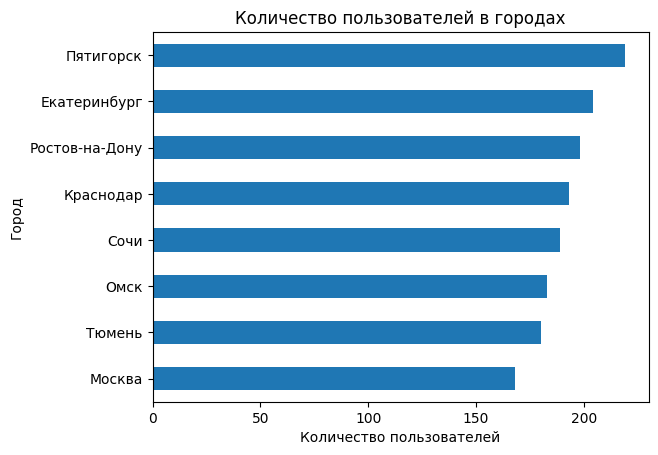

In [11]:
#Сводная таблица по городам
display(users.groupby('city')['user_id']\
             .agg('count')\
             .sort_values(ascending=False)\
             .reset_index())

#График городов по количеству пользователей в городе
users.groupby('city')['user_id']\
     .agg('count')\
     .sort_values()\
     .plot(kind='barh', title='Количество пользователей в городах');
plt.xlabel("Количество пользователей");
plt.ylabel("Город");

### Соотношение пользователей с подпиской Ultra и без подписки

,subscription_type,user_id
0,free,835
1,ultra,699


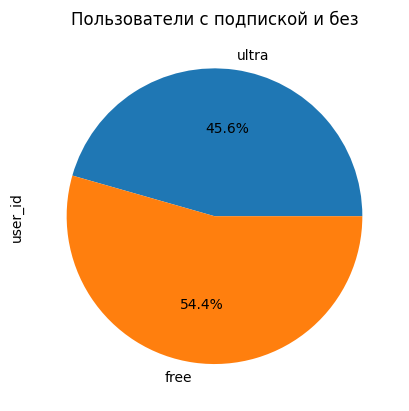

In [12]:
# Сводная таблица по типам подписки
display(users.groupby('subscription_type')['user_id']\
             .agg('count')\
             .reset_index())

# график по пользователям с подпиской и без
users.groupby('subscription_type')['user_id']\
     .agg('count')\
     .sort_values()\
     .plot(kind='pie', title='Пользователи с подпиской и без', autopct='%.1f%%');

Из графика и таблицы выше видим, что большинство пользователей пользуются бесплатной подпиской (835 пользователей, или 54.1% от общего числа). Число пользователей с подпиской составляет 699 (или 45.9%).

### Возраст пользователей  
Для начала проверим, пользователи какого возраста представлены в Таблице.

In [13]:
# Таблица по возрасту пользователей
users.groupby('age')['user_id'].agg('count')

age
12      4
13      8
14      9
15     13
16     19
17     26
18     46
19     47
20     71
21     93
22    119
23    129
24    132
25    145
26    131
27    119
28    112
29     68
30     68
31     48
32     41
33     39
34     19
35     15
36      6
37      2
38      3
39      1
43      1
Name: user_id, dtype: int64

Как видно, представленные пользователи имеют возраст от 12 до 43 лет. Сгруппируем пользователей по возрастным группам. Для этого напишем функцию age_bracket.

In [14]:
# функция age_bracket
def age_bracket(age):
    if age < 18:
        return 'до 18'
    elif 18 <= age < 26:
        return '18-25 лет'
    elif 26 <= age < 36:
        return '26-35 лет'
    else:
        return 'более 35 лет'

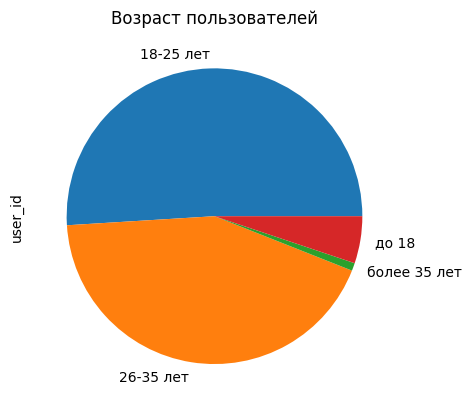

In [15]:
# добавление нового временного столбца с возрастными категориями
users['age_bracket'] = users.apply(lambda users: age_bracket(users['age']), axis = 1)

# График по возрастным группам
users.groupby('age_bracket')['user_id'].agg('count').plot(kind='pie', title='Возраст пользователей');

Как видно из графика и таблицы выше, большинство пользователей приложения (51%) составляют люди с возрастом 18-25 лет. Чуть меньше (43%) пользователей представлено группой 26-35 лет. Несовершеннолетние и пользователи сраше 35 лет составляют меньшинство.
Исследование по данному вопросу завершено. Удалим столбец 'age_bracket'.

In [16]:
# Удаление столбца age_bracket
del users['age_bracket']

### Расстояние, которое пользователь преодолел за одну поездку  
Построим гистограмму расстояний совершенных поездок и определим основные статистические данные.

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

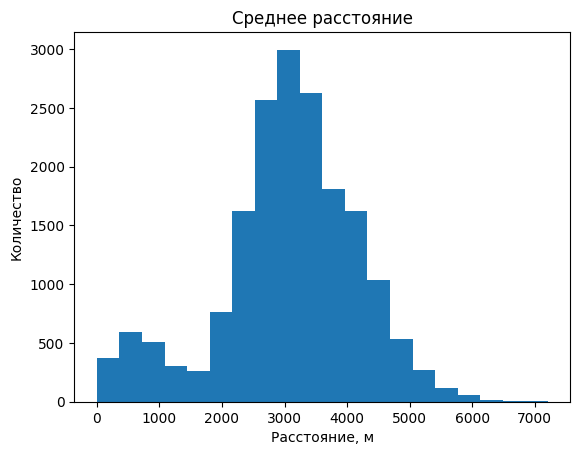

In [17]:
display(rides['distance'].describe())

# Гистограмма преодоленных расстояний
rides['distance'].plot(kind='hist', bins=20, title='Среднее расстояние');
plt.xlabel("Расстояние, м");
plt.ylabel("Количество");

Как видно из графика и таблицы выше, большинство поездок составляют около 3000 м. Медианное значение составляет 3133.6 м, среднее - 3070.7 м. Таким образом, можно сделать вывод о том, что среднее расстояние, которое преодолевают пользователи за одну поездку, составляет чуть больше 3 км.

### Продолжительность поездок  
Построим гистограмму продолжительности совершенных поездок и определим основные статистические данные.

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

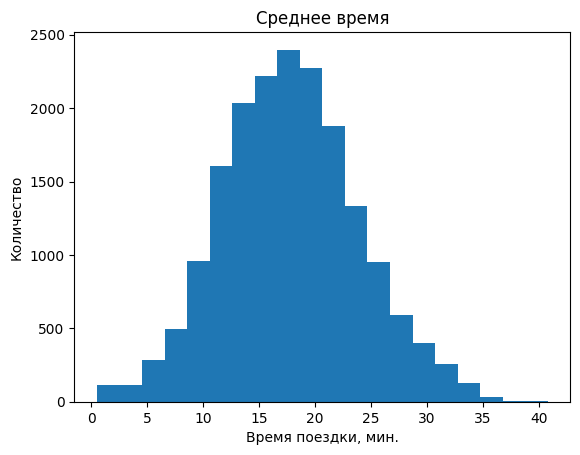

In [18]:
display(rides['duration'].describe())

# Гистограмма продолжительности поездок
rides['duration'].plot(kind='hist', bins=20, title='Среднее время');
plt.xlabel("Время поездки, мин.");
plt.ylabel("Количество");

Как видно из графика и таблицы выше, большинство поездок пользователей продолжались около 17 минут. Среднее значение составляет 17.81 мин., медиана - 17.68 мин. Большинство поездок попадают в диапазон 13.6 - 21.72 минут.  

**Выводы по разделу**  
В рамках данного раздела был проведен исследовательский анализ данных.  
Было выявлено, что большинство пользователей приложения находятся в Пятигорске, а меньшинство - в Москве.  
Большинство пользователей пользуются бесплатной подпиской (54,4%), в то время как платную подписку приобрели 45.6%.  
Большинство пользователей приложения  (51%) составляют люди с возрастом 18-25 лет. Чуть меньше (43%) пользователей представлено группой 26-35 лет. Несовершеннолетние и пользователи сраше 35 лет составляют меньшинство (в общей сложности 6%).  
Среднее расстояние, преодолеваемое пользователями за одну поездку, составляет чтуь более 3 км.  
Средняя продолжительность одной поездки составляет 13.6 - 21.72 минут.

## Объединение данных  
В рамках данного раздела мы создадим единый датафрейм data, который объединит данные о пользователях, совершенных ими поездках и типе подписки. Также создадим два отдельных датафрейма по типу подписки.

### Создание единого датафрейма

In [19]:
data = users.merge(rides, on='user_id').merge(subscriptions, on='subscription_type')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


В новом датафрейме 18068 строк, как и в датасете rides, пропуски отсутствуют. Объединение прошло удачно.

### Создание датафрейма с данными о пользователеях без подписки

In [20]:
data_free = data.query('subscription_type == "free"')

### Создание датафрейма с данными о пользователях с подпиской Ultra

In [21]:
data_ultra = data.query('subscription_type == "ultra"')

### Информация о расстоянии и времени поездок в зависимости от типа подписки  
В рамках данного раздела сравним расстояние и время поездок в зависимости от наличия или отсутствия подписки. Для этого построим гистограммы распределения расстояния и времени по типам подписки.

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

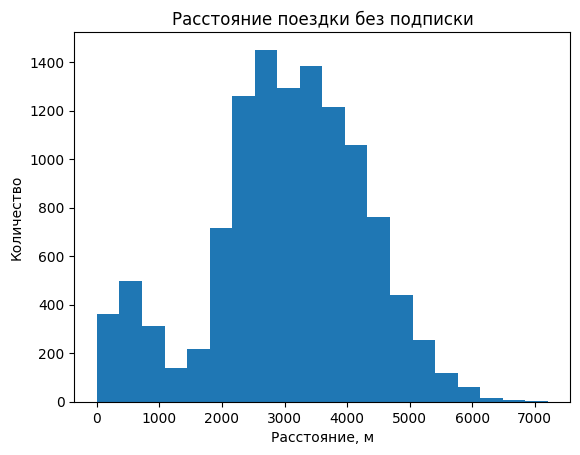

In [22]:
# Гистограмма расстояния для пользователей без подписки
data_free['distance'].plot(kind='hist', bins=20, title='Расстояние поездки без подписки');
plt.xlabel("Расстояние, м");
plt.ylabel("Количество");

data_free['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

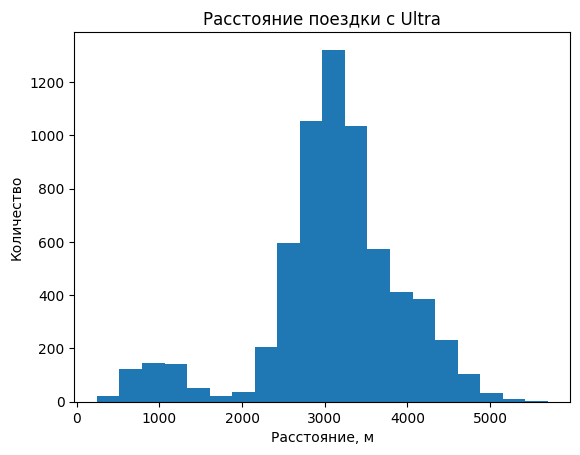

In [23]:
# Гистограмма расстояния для пользователей с подпиской
data_ultra['distance'].plot(kind='hist', bins=20, title='Расстояние поездки c Ultra');
plt.xlabel("Расстояние, м");
plt.ylabel("Количество"); 

data_ultra['distance'].describe()

По данным графикам и таблицам видно, что среднее и медианное расстояния у пользователей с разным типом подписки различаются несущественно. И те, и другие, проезжают в среднем чуть более 3 км за поездку. 

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

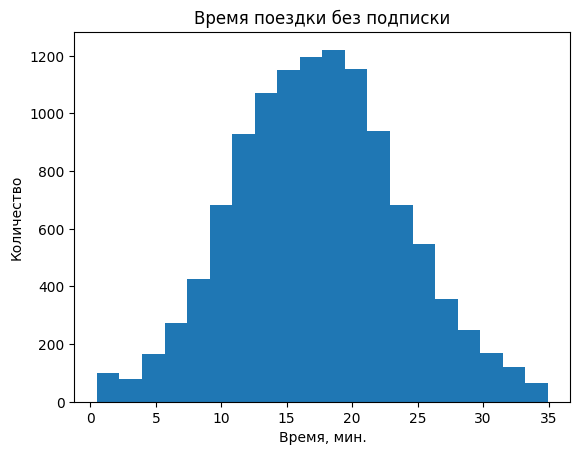

In [24]:
# Гистограмма времени для пользователей без подписки
data_free['duration'].plot(kind='hist', bins=20, title='Время поездки без подписки');
plt.xlabel("Время, мин.");
plt.ylabel("Количество");  

data_free['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

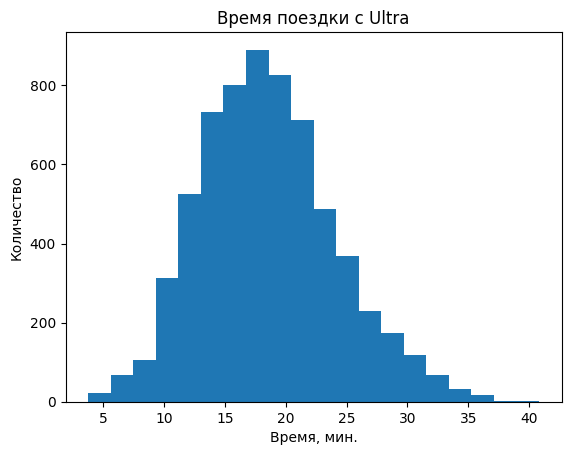

In [25]:
# Гистограмма расстояния для пользователей с подпиской
data_ultra['duration'].plot(kind='hist', bins=20, title='Время поездки c Ultra');
plt.xlabel("Время, мин.");
plt.ylabel("Количество");

data_ultra['duration'].describe()

По данным графикам и таблицам видно, что среднее время поездки у пользователей с подпиской и без различается несущественно. Так, пользователи без подписки тратят на одну поездку в среднем 17 минут, а пользователи с подпиской - 18. 

## Подсчёт выручки  
В рамках данного раздела создадим новый датафрейм с агрегированными данными о поездках каждого пользователя за каждый месяц и определим ежемесячную выручку, принесенную каждым пользователем.  
Предварительно округлим продолжительность времени каждой поездки до целого числа.

In [26]:
data['duration'] = np.ceil(data['duration'])

# создание нового датафрейма
month_data = data.pivot_table(index=('user_id', 'month'), 
                              values=('distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee'), 
                              aggfunc=('count', 'sum')
                             )
# переименуем столбцы
month_data.columns = ['count', 
                      'distance', 
                      'count_2', 
                      'duration', 
                      'count_3', 
                      'minute_price', 
                      'count_4', 
                      'start_ride_price', 
                      'count_5', 
                      'subscription_fee']

# удалим лишние столбцы-"дубликаты"
month_data = month_data.drop(['count_2', 'count_3', 'count_4', 'count_5'], axis=1)

# стоимость минуты, старта и ежемесячной подписки увеличена пропорционально количеству поездок. Приведем эти данные в првоначальное состояние
month_data['minute_price'] = month_data['minute_price']/month_data['count']
month_data['start_ride_price'] = month_data['start_ride_price']/month_data['count']
month_data['subscription_fee'] = month_data['subscription_fee']/month_data['count']
month_data = month_data.reset_index()

Добавим в новый датафрем дополнительный столбец с помесячной выручкой, которую принес каждый пользователь.

In [27]:
# добавление столбца 'proceeds'
month_data['proceeds'] = month_data['count'] * month_data['start_ride_price'] \
                         + month_data['duration'] * month_data['minute_price'] \
                         + month_data['subscription_fee']
month_data.head()

,user_id,month,count,distance,duration,minute_price,start_ride_price,subscription_fee,proceeds
0,1,1,2,7027.511294,42.0,6.0,0.0,199.0,451.0
1,1,4,1,754.159807,7.0,6.0,0.0,199.0,241.0
2,1,8,2,6723.470560,46.0,6.0,0.0,199.0,475.0
3,1,10,2,5809.911100,32.0,6.0,0.0,199.0,391.0
4,1,11,3,7003.499363,56.0,6.0,0.0,199.0,535.0


**Выводы по разделу:** вВ рамках данного раздела был проведен расчет ежемесячной выручки с каждого пользователя.

## Проверка гипотез  
В рамках данного раздела необходимо проверить следующие гипотезы:
- пользователи с подпиской тратят больше времени на поездки;
- среднее расстояние, которое проезжают пользователи с подпиской, составляет менее 3130 м;
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки;
- количество обращений в техподдержку после обновления серверов снизилась.

### Проверка гипотезы 1  
H0 - пользователи с подпиской тратят на поездки столько же времени, сколько и пользователи без подписки.  
H1 - пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

In [28]:
# определим уровень значимости в размере 0.01
alpha = 0.01
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], equal_var=False, alternative='greater')
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 5.675781377128977e-37
Отвергаем нулевую гипотезу


**Вывод:** Значение p-value меньше уровня значимости. По результатам проверки гипотезы есть основания предполагать, что пользователи с подпиской в среднем тратят больше времени на поездки в отличие от пользователей без подписки.

### Проверка гипотезы 2  
H0 - пользователи с подпиской проезжают в среднем 3130 м за одну поездку.  
H1 - пользователи с подпиской проезжают в среднем больше 3130 м за одну поездку.

In [29]:
# оптимальное значение с точки зрения износа
interested_value = 3130
# определим уровень значимости в размере 0.01
alpha = 0.01
results = st.ttest_1samp(data_ultra['distance'], interested_value, alternative='greater')
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


**Вывод:** Значение p-value больше уровня значимости. По результатам проверки гипотезы есть основания предполагать, что пользователи с подпиской в среднем проезжают 3130 м или менее за одну поездку.

### Проверка гипотезы 3  
H0 - помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки.  
H1 - помесячная выручка от пользователей с подпиской больше, чем выручка от пользователей без подписки.

In [31]:
# определим уровень значимости в размере 0.01
alpha = 0.01
results = st.ttest_ind(month_data.loc[month_data['subscription_fee']>0, 'proceeds'], 
                       month_data.loc[month_data['subscription_fee']==0, 'proceeds'], 
                       equal_var=False, 
                       alternative = 'greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 8.874140893976874e-40
Отвергаем нулевую гипотезу


**Вывод:** по результатам проверки гипотезы есть основания предполагать, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

## Выводы  
В рамках данного проекта было проведено исследование данных о пользователях сервиса аренды самокатов GoFast, а именно: 
1. исследованы следующие параметры:  
    - частота встречаемости городов: большинство пользователей приложения находятся в Пятигорске. Минимальное количество пользователей в Москве;  
    - соотношение пользователей с подпиской и без подписки:  большинство пользователей пользуются бесплатной подпиской (835 пользователей, или 54.1% от общего числа). Число пользователей с подпиской составляет 699 (или 45.9%);  
    - возраст пользователей:  большинство пользователей приложения (51%) составляют люди с возрастом 18-25 лет. Чуть меньше (43%) пользователей представлено группой 26-35 лет;  
    - расстояние, которое пользователь преодолел за одну поездку: среднее расстояние, которое преодолевают пользователи за одну поездку, составляет чуть больше 3 км;  
    - продолжительность поездок: большинство поездок попадают в диапазон 13.6 - 21.72 минут.  
2. произведен подсчет ежемесячной выручки по пользователям.  
3. проверены следующие гипотезы:  
    - пользователи с подпиской тратят больше времени на поездки:есть основания предполагать, что пользователи с подпиской в среднем тратят больше времени на поездки в отличие от пользователей без подписки.  
    - среднее расстояние, которое проезжают пользователи с подпиской, составляет менее 3130 м: есть основания предполагать, что пользователи с подпиской в среднем проезжают 3130 м или менее за одну поездку.  
    - помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки: есть основания предполагать, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без est_rel().  